In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

from datetime import datetime
import airportsdata
import plotly.graph_objects as go
import plotly.figure_factory as ff
#import geopandas as gpd

In [2]:
data=pd.read_csv('C://Users//nzy12//Documents//GitHub//productsall2006snr5132022.csv')

In [3]:
data

,Origin,Dest,Up,Down,Distance,fs,Price,quantity,Connecting,Newonline,...,withinshare,AAAS,CODLNW,UAUS,mAAAS,mCODLNW,mUAUS,mc6,delta,mk_tco
0,LAX,ATL,DL,DL,1946,1r,224.755073,4238,1,1,...,0.494055,0,1,0,0,1,1,71.437893,-5.399169,1
1,LAX,ATL,FL,FL,1946,1r,177.977876,791,1,1,...,0.092213,0,0,0,0,1,1,73.498577,-7.077718,1
2,LAX,ATL,US,US,1946,1r,214.361111,36,1,1,...,0.004197,0,0,1,0,1,1,110.735613,-10.167497,1
3,LAX,ATL,AA,AA,1967,2r,168.412500,160,DFW,1,...,0.018652,1,0,0,0,1,1,65.747636,-8.675842,1
4,LAX,ATL,AA,AA,2937,2r,210.500000,1,MIA,1,...,0.000117,1,0,0,0,1,1,107.835136,-13.751016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261305,DCA,ICT,NW,CO,1215,2r,129.500000,7,MEM,0,...,0.025830,0,1,0,0,1,0,23.833432,-10.345526,1
261306,DCA,ICT,NW,DL,1215,2r,129.000000,2,MEM,0,...,0.007380,0,1,0,0,1,0,21.054109,-11.598289,1
261307,DCA,ICT,NW,NW,1215,2r,160.592105,38,MEM,1,...,0.140221,0,1,0,0,1,0,49.859511,-8.653850,1
261308,DCA,ICT,NW,NW,1476,2r,156.062500,8,MSP,1,...,0.029520,0,1,0,0,1,0,45.329906,-10.211994,1


In [4]:
#get the location of each airports
airports =airportsdata.load('IATA')
airports =pd.DataFrame(airports)
airports=airports.transpose()
#airports=airports[['iata','lat','lon']]
airports

,icao,iata,name,city,subd,country,elevation,lat,lon,tz
ICY,19AK,ICY,Icy Bay Airport,Icy Bay,Alaska,US,50.0,59.969002,-141.662003,America/Anchorage
HGZ,2AK6,HGZ,Hog River Airport,Hogatza,Alaska,US,534.0,66.216103,-155.669006,America/Anchorage
BYW,38WA,BYW,Blakely Island Airport,Blakely Island,Washington,US,66.0,48.578999,-122.825996,America/Los_Angeles
BDF,3IS8,BDF,Rinkenberger Restricted Landing Area,Bradford,Illinois,US,808.0,41.2309,-89.6157,America/Chicago
BCS,65LA,BCS,Southern Seaplane Airport,Belle Chasse,Louisiana,US,0.0,29.8661,-90.022202,America/Chicago
...,...,...,...,...,...,...,...,...,...,...
DLC,ZYTL,DLC,Zhoushuizi Airport,Dalian,Liaoning,CN,107.0,38.965698,121.539001,Asia/Shanghai
TNH,ZYTN,TNH,Tonghua Sanyuanpu Airport,Tonghua,Jilin,CN,1200.0,42.253889,125.703333,Asia/Shanghai
SHE,ZYTX,SHE,Taoxian Airport,Shenyang,Liaoning,CN,198.0,41.639801,123.483002,Asia/Shanghai
XEN,ZYXC,XEN,Xingcheng Air Base,,Liaoning,CN,30.0,40.580299,120.697998,Asia/Shanghai


In [5]:
data_2=data.merge(airports, left_on='Origin',right_on='iata')
data_2.rename(columns = {'lat':'Origin_lat', 'lon':'Origin_lon'}, inplace = True)
data_2

,Origin,Dest,Up,Down,Distance,fs,Price,quantity,Connecting,Newonline,...,icao,iata,name,city,subd,country,elevation,Origin_lat,Origin_lon,tz
0,LAX,ATL,DL,DL,1946,1r,224.755073,4238,1,1,...,KLAX,LAX,Los Angeles International Airport,Los Angeles,California,US,125.0,33.942501,-118.407997,America/Los_Angeles
1,LAX,ATL,FL,FL,1946,1r,177.977876,791,1,1,...,KLAX,LAX,Los Angeles International Airport,Los Angeles,California,US,125.0,33.942501,-118.407997,America/Los_Angeles
2,LAX,ATL,US,US,1946,1r,214.361111,36,1,1,...,KLAX,LAX,Los Angeles International Airport,Los Angeles,California,US,125.0,33.942501,-118.407997,America/Los_Angeles
3,LAX,ATL,AA,AA,1967,2r,168.412500,160,DFW,1,...,KLAX,LAX,Los Angeles International Airport,Los Angeles,California,US,125.0,33.942501,-118.407997,America/Los_Angeles
4,LAX,ATL,AA,AA,2937,2r,210.500000,1,MIA,1,...,KLAX,LAX,Los Angeles International Airport,Los Angeles,California,US,125.0,33.942501,-118.407997,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261305,DAL,ELP,WN,WN,565,2r,204.500000,1,MAF,1,...,KDAL,DAL,Dallas Love Field,Dallas,Texas,US,487.0,32.847099,-96.851799,America/Chicago
261306,DAL,ELP,WN,WN,744,2r,139.500000,7,SAT,1,...,KDAL,DAL,Dallas Love Field,Dallas,Texas,US,487.0,32.847099,-96.851799,America/Chicago
261307,DAL,TUL,WN,WN,237,1r,92.767668,1698,1,1,...,KDAL,DAL,Dallas Love Field,Dallas,Texas,US,487.0,32.847099,-96.851799,America/Chicago
261308,DAL,LIT,WN,WN,296,1r,86.982877,1752,1,1,...,KDAL,DAL,Dallas Love Field,Dallas,Texas,US,487.0,32.847099,-96.851799,America/Chicago


In [6]:
data_2=data_2.merge(airports, left_on='Dest',right_on='iata')
data_2.rename(columns = {'lat':'Dest_lat', 'lon':'Dest_lon'}, inplace = True)
data_2

,Origin,Dest,Up,Down,Distance,fs,Price,quantity,Connecting,Newonline,...,icao_y,iata_y,name_y,city_y,subd_y,country_y,elevation_y,Dest_lat,Dest_lon,tz_y
0,LAX,ATL,DL,DL,1946,1r,224.755073,4238,1,1,...,KATL,ATL,Hartsfield Jackson Atlanta International Airport,Atlanta,Georgia,US,1026.0,33.6367,-84.428101,America/New_York
1,LAX,ATL,FL,FL,1946,1r,177.977876,791,1,1,...,KATL,ATL,Hartsfield Jackson Atlanta International Airport,Atlanta,Georgia,US,1026.0,33.6367,-84.428101,America/New_York
2,LAX,ATL,US,US,1946,1r,214.361111,36,1,1,...,KATL,ATL,Hartsfield Jackson Atlanta International Airport,Atlanta,Georgia,US,1026.0,33.6367,-84.428101,America/New_York
3,LAX,ATL,AA,AA,1967,2r,168.412500,160,DFW,1,...,KATL,ATL,Hartsfield Jackson Atlanta International Airport,Atlanta,Georgia,US,1026.0,33.6367,-84.428101,America/New_York
4,LAX,ATL,AA,AA,2937,2r,210.500000,1,MIA,1,...,KATL,ATL,Hartsfield Jackson Atlanta International Airport,Atlanta,Georgia,US,1026.0,33.6367,-84.428101,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261305,SMF,LGB,B6,B6,387,1r,80.690258,1201,1,1,...,KLGB,LGB,Long Beach /Daugherty Field/ Airport,Long Beach,California,US,60.0,33.817699,-118.152,America/Los_Angeles
261306,SMF,LGB,US,US,1002,2r,167.500000,3,PHX,1,...,KLGB,LGB,Long Beach /Daugherty Field/ Airport,Long Beach,California,US,60.0,33.817699,-118.152,America/Los_Angeles
261307,SMF,LGB,B6,B6,387,1r,80.944378,1681,1,1,...,KLGB,LGB,Long Beach /Daugherty Field/ Airport,Long Beach,California,US,60.0,33.817699,-118.152,America/Los_Angeles
261308,SMF,LGB,US,US,1002,2r,215.500000,2,PHX,1,...,KLGB,LGB,Long Beach /Daugherty Field/ Airport,Long Beach,California,US,60.0,33.817699,-118.152,America/Los_Angeles


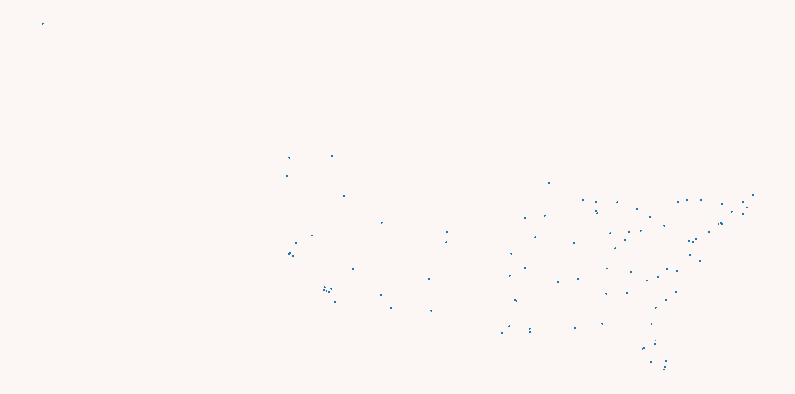

In [12]:
fig, ax =plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14,7)

ax.scatter(data_2['Origin_lon'],data_2['Origin_lat'],s=1,edgecolors='none')
ax.axis('off')
plt.show()

In [12]:
data = data_2.sample(frac=1.0).head(20000)

In [32]:
data_cnt=data_2.groupby(["Origin","Dest","Origin_lon","Origin_lat","Dest_lon","Dest_lat"])['quantity'].agg(['sum','count']).reset_index()

In [33]:
data_cnt

,Origin,Dest,Origin_lon,Origin_lat,Dest_lon,Dest_lat,sum,count
0,ABQ,ATL,-106.609001,35.040199,-84.428101,33.636700,2479,49
1,ABQ,AUS,-106.609001,35.040199,-97.669899,30.194500,2514,42
2,ABQ,BDL,-106.609001,35.040199,-72.683197,41.938900,990,59
3,ABQ,BNA,-106.609001,35.040199,-86.678200,36.124500,1531,57
4,ABQ,BOS,-106.609001,35.040199,-71.005203,42.364300,1733,62
...,...,...,...,...,...,...,...,...
4486,TYS,PHL,-83.994003,35.811001,-75.241096,39.871899,1330,33
4487,TYS,PHX,-83.994003,35.811001,-112.012001,33.434299,230,15
4488,TYS,SEA,-83.994003,35.811001,-122.308998,47.449001,526,31
4489,TYS,SFO,-83.994003,35.811001,-122.375000,37.618999,496,33


In [34]:
fig=go.Figure()

In [35]:
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = data_cnt['Origin_lon'],
    lat = data_cnt['Origin_lat'],
    hoverinfo = 'text',
    text = data_cnt['Origin'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))


O_to_D=zip(data_cnt["Origin_lon"])
fig.show()

In [ ]:
fig.show()